In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.show()
import seaborn as sns

In [2]:
# importing data file
df = pd.read_csv("/Users/adityajha/Desktop/breast-cancer.csv", header = None)
# importing header file
df_head = pd.read_csv("/Users/adityajha/Desktop/field_names.txt", header = None)

In [3]:
# displaying top 5 rows of data
df.head() 

0  1      2      3       4       5        6        7       8   \
0    842302  M  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001   
1    842517  M  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869   
2  84300903  M  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974   
3  84348301  M  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414   
4  84358402  M  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.1980   

        9    ...        22     23      24      25      26      27      28  \
0  0.14710   ...     25.38  17.33  184.60  2019.0  0.1622  0.6656  0.7119   
1  0.07017   ...     24.99  23.41  158.80  1956.0  0.1238  0.1866  0.2416   
2  0.12790   ...     23.57  25.53  152.50  1709.0  0.1444  0.4245  0.4504   
3  0.10520   ...     14.91  26.50   98.87   567.7  0.2098  0.8663  0.6869   
4  0.10430   ...     22.54  16.67  152.20  1575.0  0.1374  0.2050  0.4000   

       29      30       31  
0  0.2654  0.4601  0.11890  
1  0.1860  0.2750  0.08902  
2  0.2430  0.3613  0.08758  
3  0.2575  0.6638  0.17300  
4  0.1625  0.2364  0.07678  

[5 rows x 32 columns]

In [4]:
# displaying top 5 rows of header columns
df_head.head() 

0
0               ID
1        diagnosis
2      radius_mean
3  radius_sd_error
4     radius_worst

In [5]:
# assigning names to each column
# column names contain special characters which we will need to remove
df.columns = df_head 
df.columns 

Index([                        ('ID',),                  ('diagnosis',),
                      ('radius_mean',),            ('radius_sd_error',),
                     ('radius_worst',),               ('texture_mean',),
                 ('texture_sd_error',),              ('texture_worst',),
                   ('perimeter_mean',),         ('perimeter_sd_error',),
                  ('perimeter_worst',),                  ('area_mean',),
                    ('area_sd_error',),                 ('area_worst',),
                  ('smoothness_mean',),        ('smoothness_sd_error',),
                 ('smoothness_worst',),           ('compactness_mean',),
             ('compactness_sd_error',),          ('compactness_worst',),
                   ('concavity_mean',),         ('concavity_sd_error',),
                  ('concavity_worst',),        ('concave_points_mean',),
          ('concave_points_sd_error',),       ('concave_points_worst',),
                    ('symmetry_mean',),          ('

In [6]:
# class of columns is tuple, we need to change it to string type before removing special chars
df.columns.map(type) 

Index([<class 'tuple'>, <class 'tuple'>, <class 'tuple'>, <class 'tuple'>,
       <class 'tuple'>, <class 'tuple'>, <class 'tuple'>, <class 'tuple'>,
       <class 'tuple'>, <class 'tuple'>, <class 'tuple'>, <class 'tuple'>,
       <class 'tuple'>, <class 'tuple'>, <class 'tuple'>, <class 'tuple'>,
       <class 'tuple'>, <class 'tuple'>, <class 'tuple'>, <class 'tuple'>,
       <class 'tuple'>, <class 'tuple'>, <class 'tuple'>, <class 'tuple'>,
       <class 'tuple'>, <class 'tuple'>, <class 'tuple'>, <class 'tuple'>,
       <class 'tuple'>, <class 'tuple'>, <class 'tuple'>, <class 'tuple'>],
      dtype='object')

In [7]:
# column class changed to string type
df.columns = [str(s) for s in df.columns]
df.columns.map(type) 

Index([<class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>],
      dtype='object')

In [9]:
# removing special characters
df.columns = df.columns.str.strip(',').str.strip('(').str.strip(')').str.strip("'") 

In [10]:
# tabular data with correct column names
df.head() 

ID diagnosis  radius_mean  radius_sd_error  radius_worst  \
0    842302         M        17.99            10.38        122.80   
1    842517         M        20.57            17.77        132.90   
2  84300903         M        19.69            21.25        130.00   
3  84348301         M        11.42            20.38         77.58   
4  84358402         M        20.29            14.34        135.10   

   texture_mean  texture_sd_error  texture_worst  perimeter_mean  \
0        1001.0           0.11840        0.27760          0.3001   
1        1326.0           0.08474        0.07864          0.0869   
2        1203.0           0.10960        0.15990          0.1974   
3         386.1           0.14250        0.28390          0.2414   
4        1297.0           0.10030        0.13280          0.1980   

   perimeter_sd_error           ...             concavity_worst  \
0             0.14710           ...                       25.38   
1             0.07017           ...                       24.99   
2             0.12790           ...                       23.57   
3             0.10520           ...                       14.91   
4             0.10430           ...                       22.54   

   concave_points_mean  concave_points_sd_error  concave_points_worst  \
0                17.33                   184.60                2019.0   
1                23.41                   158.80                1956.0   
2                25.53                   152.50                1709.0   
3                26.50                    98.87                 567.7   
4                16.67                   152.20                1575.0   

   symmetry_mean  symmetry_sd_error  symmetry_worst  fractal_dimension_mean  \
0         0.1622             0.6656          0.7119                  0.2654   
1         0.1238             0.1866          0.2416                  0.1860   
2         0.1444             0.4245          0.4504                  0.2430   
3         0.2098             0.8663          0.6869                  0.2575   
4         0.1374             0.2050          0.4000                  0.1625   

   fractal_dimension_sd_error  fractal_dimension_worst  
0                      0.4601                  0.11890  
1                      0.2750                  0.08902  
2                      0.3613                  0.08758  
3                      0.6638                  0.17300  
4                      0.2364                  0.07678  

[5 rows x 32 columns]

In [11]:
# getting the shape of available data(no. of rows, columns)
df.shape 

(569, 32)

In [12]:
# getting the details of distribution of independent numeric variables
# in current problem statement we will verify for duplicates and missing values. 
#Though we should also check for skewness, outliers and for corrleated variables. We will skip that for now
# we will standardize( feature scale) our data set before running models on it
df.describe() 

ID  radius_mean  radius_sd_error  radius_worst  texture_mean  \
count  5.690000e+02   569.000000       569.000000    569.000000    569.000000   
mean   3.037183e+07    14.127292        19.289649     91.969033    654.889104   
std    1.250206e+08     3.524049         4.301036     24.298981    351.914129   
min    8.670000e+03     6.981000         9.710000     43.790000    143.500000   
25%    8.692180e+05    11.700000        16.170000     75.170000    420.300000   
50%    9.060240e+05    13.370000        18.840000     86.240000    551.100000   
75%    8.813129e+06    15.780000        21.800000    104.100000    782.700000   
max    9.113205e+08    28.110000        39.280000    188.500000   2501.000000   

       texture_sd_error  texture_worst  perimeter_mean  perimeter_sd_error  \
count        569.000000     569.000000      569.000000          569.000000   
mean           0.096360       0.104341        0.088799            0.048919   
std            0.014064       0.052813        0.079720            0.038803   
min            0.052630       0.019380        0.000000            0.000000   
25%            0.086370       0.064920        0.029560            0.020310   
50%            0.095870       0.092630        0.061540            0.033500   
75%            0.105300       0.130400        0.130700            0.074000   
max            0.163400       0.345400        0.426800            0.201200   

       perimeter_worst           ...             concavity_worst  \
count       569.000000           ...                  569.000000   
mean          0.181162           ...                   16.269190   
std           0.027414           ...                    4.833242   
min           0.106000           ...                    7.930000   
25%           0.161900           ...                   13.010000   
50%           0.179200           ...                   14.970000   
75%           0.195700           ...                   18.790000   
max           0.304000           ...                   36.040000   

       concave_points_mean  concave_points_sd_error  concave_points_worst  \
count           569.000000               569.000000            569.000000   
mean             25.677223               107.261213            880.583128   
std               6.146258                33.602542            569.356993   
min              12.020000                50.410000            185.200000   
25%              21.080000                84.110000            515.300000   
50%              25.410000                97.660000            686.500000   
75%              29.720000               125.400000           1084.000000   
max              49.540000               251.200000           4254.000000   

       symmetry_mean  symmetry_sd_error  symmetry_worst  \
count     569.000000         569.000000      569.000000   
mean        0.132369           0.254265        0.272188   
std         0.022832           0.157336        0.208624   
min         0.071170           0.027290        0.000000   
25%         0.116600           0.147200        0.114500   
50%         0.131300           0.211900        0.226700   
75%         0.146000           0.339100        0.382900   
max         0.222600           1.058000        1.252000   

       fractal_dimension_mean  fractal_dimension_sd_error  \
count              569.000000                  569.000000   
mean                 0.114606                    0.290076   
std                  0.065732                    0.061867   
min                  0.000000                    0.156500   
25%                  0.064930                    0.250400   
50%                  0.099930                    0.282200   
75%                  0.161400                    0.317900   
max                  0.291000                    0.663800   

       fractal_dimension_worst  
count               569.000000  
mean                  0.083946  
std                   0.018061  
min                   0.055040  
25%                   0.071460

In [13]:
# getting the binary distribution of categorical o/p variable 'diagnosis' either through
#indexing or using column name. As both classes are optimally populated, it doesn't look a case of imbalanced data set.
#df.iloc[:,1].value_counts() 
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [14]:
#checking whether the dataset contains any missing value
df.isnull().values.any() 

False

In [15]:
#checking whether the dataset contains any duplicate value
df.duplicated().values.any() 

False

In [16]:
# removing the column ID, as it won't be useful for analysis purpose
df_new = df
df_new = df_new.drop('ID', axis =1)
df_new.head()

diagnosis  radius_mean  radius_sd_error  radius_worst  texture_mean  \
0         M        17.99            10.38        122.80        1001.0   
1         M        20.57            17.77        132.90        1326.0   
2         M        19.69            21.25        130.00        1203.0   
3         M        11.42            20.38         77.58         386.1   
4         M        20.29            14.34        135.10        1297.0   

   texture_sd_error  texture_worst  perimeter_mean  perimeter_sd_error  \
0           0.11840        0.27760          0.3001             0.14710   
1           0.08474        0.07864          0.0869             0.07017   
2           0.10960        0.15990          0.1974             0.12790   
3           0.14250        0.28390          0.2414             0.10520   
4           0.10030        0.13280          0.1980             0.10430   

   perimeter_worst           ...             concavity_worst  \
0           0.2419           ...                       25.38   
1           0.1812           ...                       24.99   
2           0.2069           ...                       23.57   
3           0.2597           ...                       14.91   
4           0.1809           ...                       22.54   

   concave_points_mean  concave_points_sd_error  concave_points_worst  \
0                17.33                   184.60                2019.0   
1                23.41                   158.80                1956.0   
2                25.53                   152.50                1709.0   
3                26.50                    98.87                 567.7   
4                16.67                   152.20                1575.0   

   symmetry_mean  symmetry_sd_error  symmetry_worst  fractal_dimension_mean  \
0         0.1622             0.6656          0.7119                  0.2654   
1         0.1238             0.1866          0.2416                  0.1860   
2         0.1444             0.4245          0.4504                  0.2430   
3         0.2098             0.8663          0.6869                  0.2575   
4         0.1374             0.2050          0.4000                  0.1625   

   fractal_dimension_sd_error  fractal_dimension_worst  
0                      0.4601                  0.11890  
1                      0.2750                  0.08902  
2                      0.3613                  0.08758  
3                      0.6638                  0.17300  
4                      0.2364                  0.07678  

[5 rows x 31 columns]

In [17]:
# we can see the difference in smootheness_mean for diagnosis type. 
#We can see that for M class, the mean value is almost double
df_new.groupby('diagnosis')['smoothness_mean'].mean()

diagnosis
B    2.000321
M    4.323929
Name: smoothness_mean, dtype: float64

In [18]:
# we can see the difference in smootheness_mean for diagnosis type
#We can see that for M class, the median value is little shy of 3 times
df_new.groupby('diagnosis')['smoothness_mean'].median()

diagnosis
B    1.8510
M    3.6795
Name: smoothness_mean, dtype: float64

In [19]:
# we can see the difference in compactness_mean for diagnosis type
#We can see that for M class, the mean value is almost one and a half times more
df_new.groupby('diagnosis')['compactness_mean'].mean()

diagnosis
B    0.021438
M    0.032281
Name: compactness_mean, dtype: float64

In [20]:
# we can see the difference in compactness_mean for diagnosis type
#We can see that for M class, the median value is close to 1.75 times
df_new.groupby('diagnosis')['compactness_mean'].median()

diagnosis
B    0.01631
M    0.02859
Name: compactness_mean, dtype: float64

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


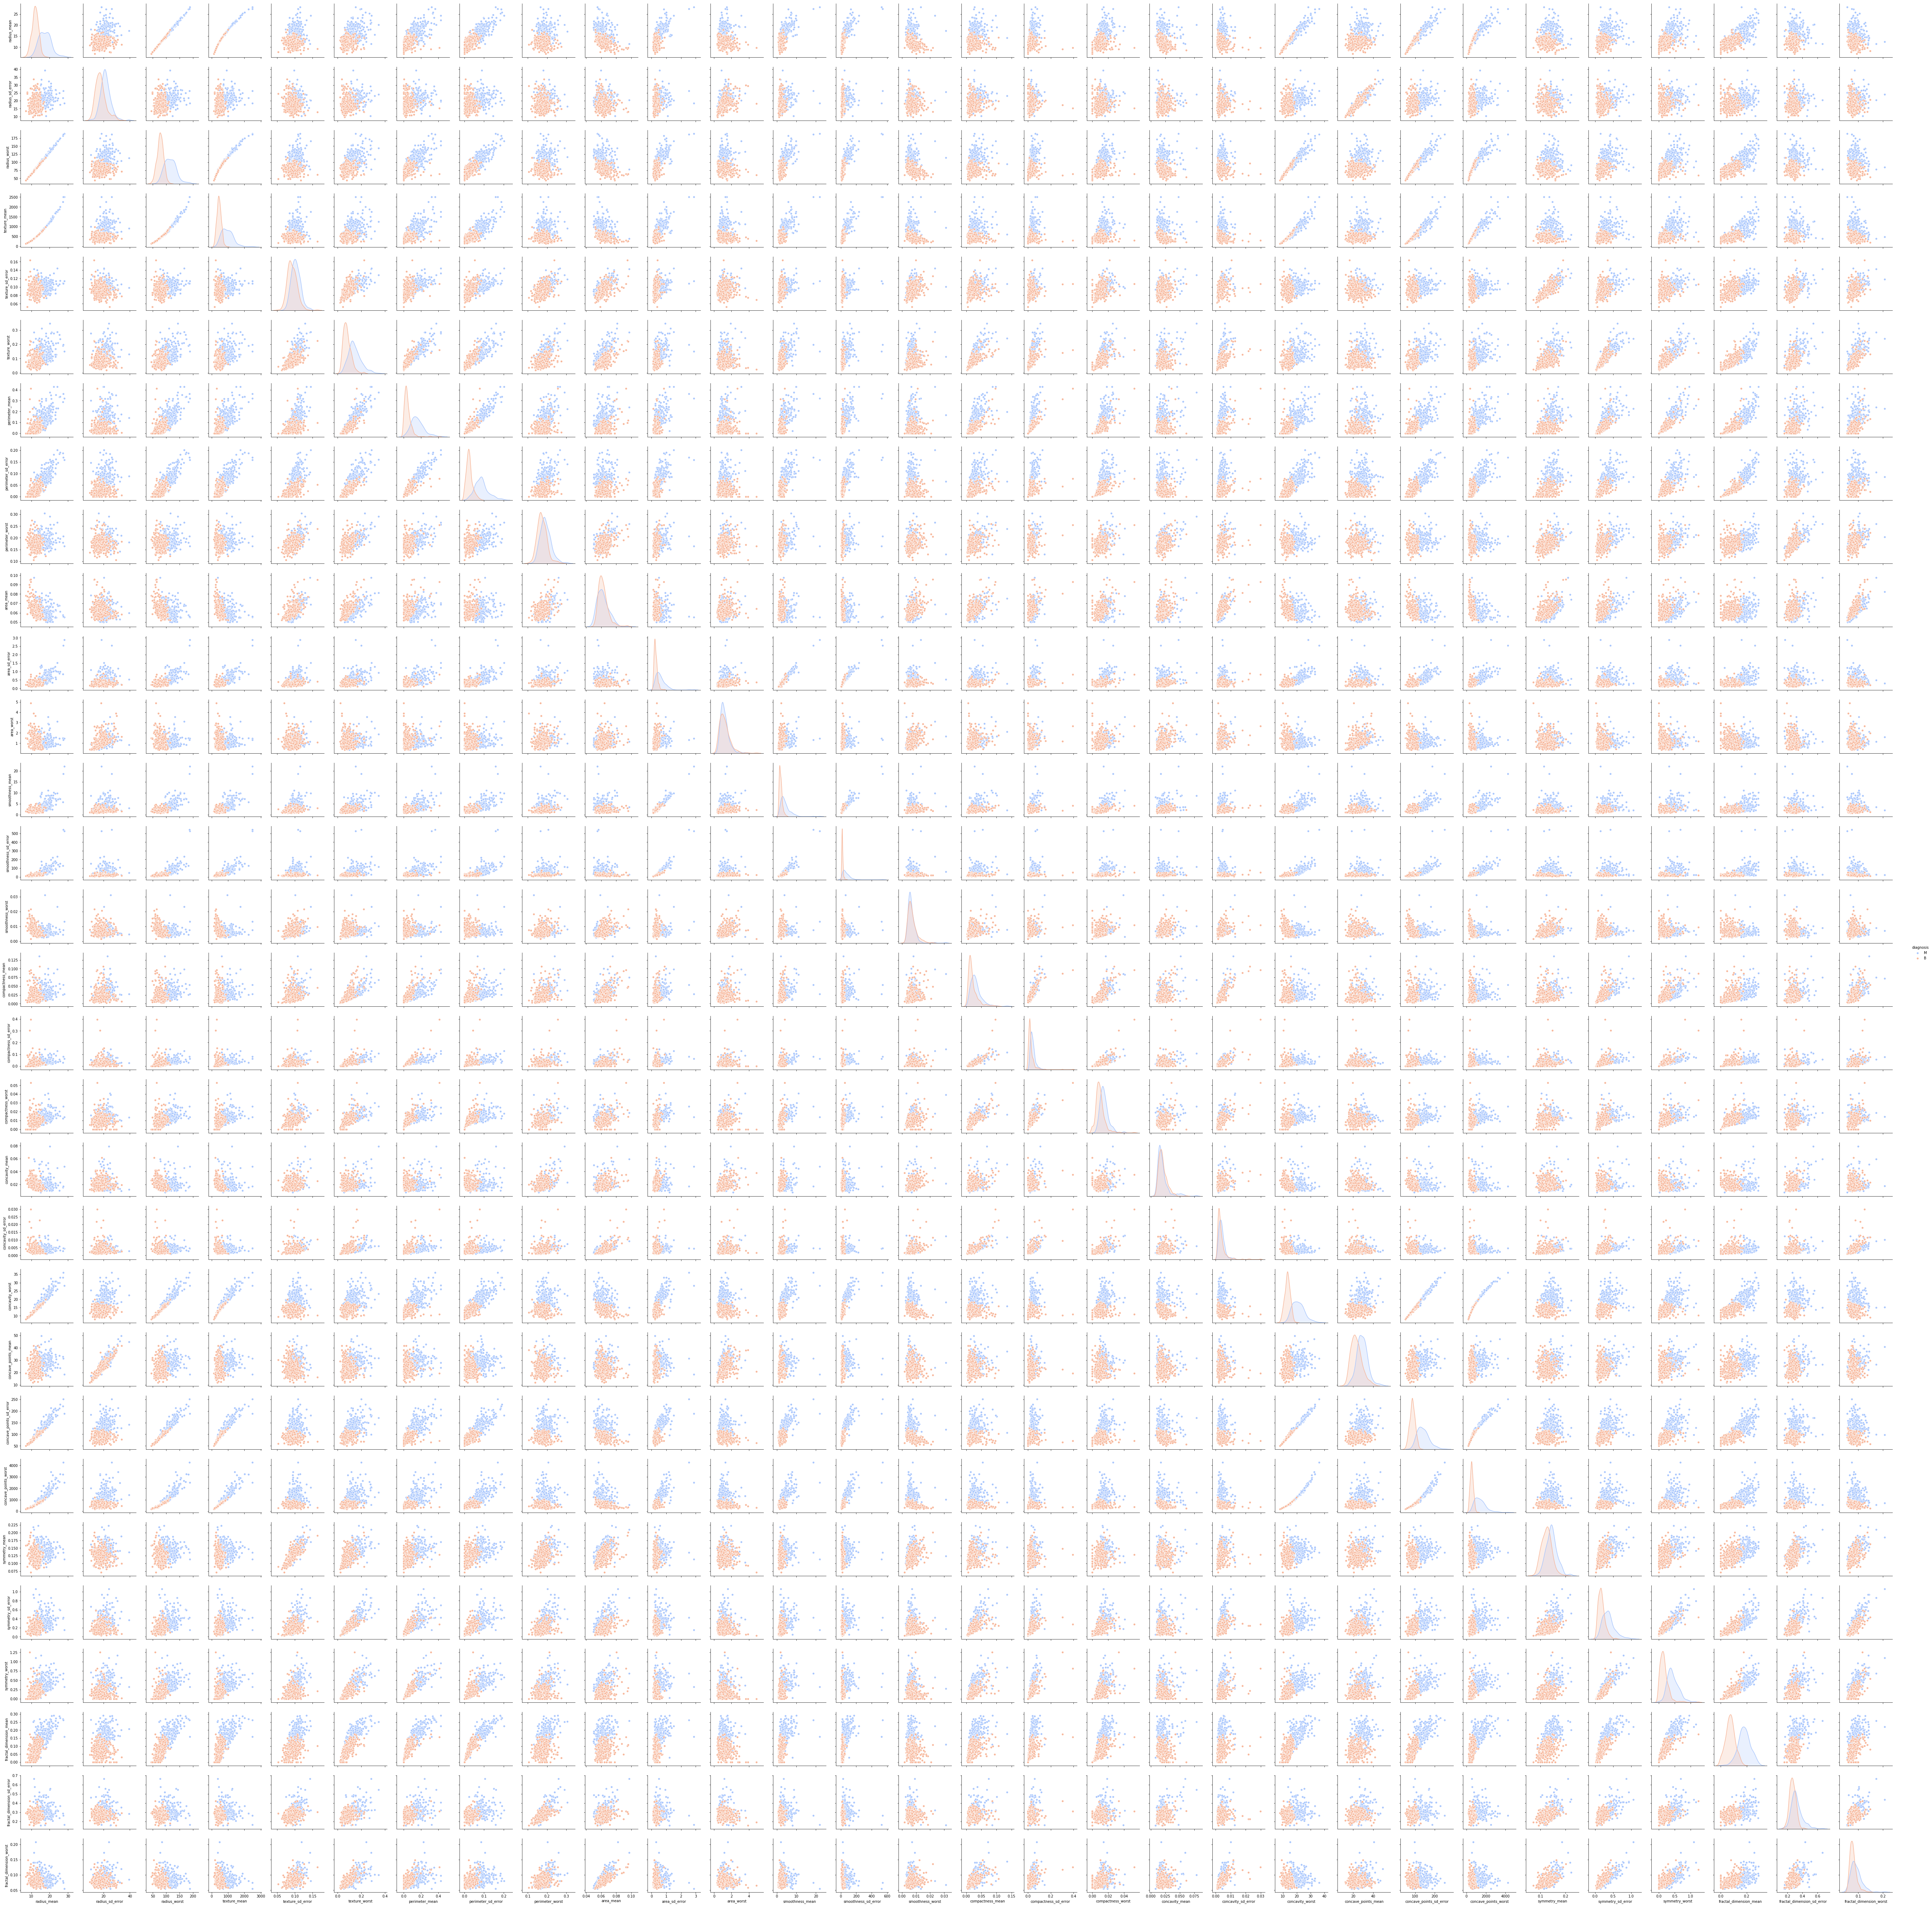

In [21]:
# By expanding the below graphs, we can see different spreads based on 'diagnosis' class for variables like 'smoothness_mean', 'concavity_worst', 'area_worst', 'symmetry_worst',
#'area_mean','perimeter_sd_error', 'fractal_dimension_mean','concavity_worst', 'concave_points_sd_error', 'concave_points_worst'. 

sns.pairplot(df_new, hue = 'diagnosis',palette = 'coolwarm')



In [22]:
# Splitting the dataset into the Training set and Test set
X = df_new.iloc[:,1:30].values
y = df_new.iloc[:,0].values
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [36]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [37]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [41]:
# the 5 most important features 
print(classifier.coef_)
coefs=classifier.coef_[0]
top_five = np.argpartition(coefs, -5)[-5:]
print(df_new.columns[top_five])

[[ 0.26629619  0.58417633  0.28382138  0.35497593  0.08924906 -0.40365125
   0.70811443  0.84438647  0.4621696   0.09243333  1.38104882 -0.12907527
   0.96300304  0.94576968 -0.21149199 -0.97377508 -0.15136833  0.27857804
  -0.27242395 -0.61368066  0.92068426  0.94649067  0.82573698  0.8776181
   0.53220713  0.05899847  0.90358029  1.05039696  0.65185237]]
Index(['smoothness_mean', 'concavity_worst', 'area_worst', 'symmetry_worst',
       'area_mean'],
      dtype='object')


In [42]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [43]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
cr = classification_report(y_test, y_pred)

In [44]:
cm

array([[86,  4],
       [ 4, 49]])

In [45]:
ac

0.9440559440559441

In [46]:
print(cr)

             precision    recall  f1-score   support

          B       0.96      0.96      0.96        90
          M       0.92      0.92      0.92        53

avg / total       0.94      0.94      0.94       143



In [47]:
# creating new data set for random forest
df_rand = df_new
# Splitting the dataset into the Training set and Test set
X1 = df_rand.iloc[:,1:30].values
y1 = df_rand.iloc[:,0].values
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.25, random_state = 0)
# Feature Scaling
X1_train = sc.fit_transform(X1_train)
X1_test = sc.transform(X1_test)

In [48]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(X1_train, y1_train)

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [49]:
# Predicting the Test set results
y1_pred = classifier.predict(X1_test)

In [50]:
cm1 = confusion_matrix(y1_test, y1_pred)
ac1 = accuracy_score(y1_test, y1_pred)
cr1 = classification_report(y1_test, y1_pred)

In [51]:
cm1

array([[88,  2],
       [ 1, 52]])

In [52]:
ac1

0.9790209790209791

In [53]:
print(cr1)

             precision    recall  f1-score   support

          B       0.99      0.98      0.98        90
          M       0.96      0.98      0.97        53

avg / total       0.98      0.98      0.98       143



In [62]:
print(classifier.feature_importances_)
feature_imp = pd.Series(classifier.feature_importances_,index=df_rand.iloc[:,1:30].columns).sort_values(ascending=False)
feature_imp

[0.02925965 0.02464382 0.0405914  0.02545335 0.00454308 0.00942715
 0.04971125 0.16740743 0.00514306 0.00592667 0.00852218 0.00395706
 0.0192098  0.04762187 0.00498001 0.00727561 0.00847669 0.00755784
 0.00710408 0.0047055  0.10212514 0.03153385 0.09239868 0.08538225
 0.01760984 0.01479718 0.05387321 0.10706501 0.01369735]


perimeter_sd_error            0.167407
fractal_dimension_mean        0.107065
concavity_worst               0.102125
concave_points_sd_error       0.092399
concave_points_worst          0.085382
symmetry_worst                0.053873
perimeter_mean                0.049711
smoothness_sd_error           0.047622
radius_worst                  0.040591
concave_points_mean           0.031534
radius_mean                   0.029260
texture_mean                  0.025453
radius_sd_error               0.024644
smoothness_mean               0.019210
symmetry_mean                 0.017610
symmetry_sd_error             0.014797
fractal_dimension_sd_error    0.013697
texture_worst                 0.009427
area_sd_error                 0.008522
compactness_sd_error          0.008477
compactness_worst             0.007558
compactness_mean              0.007276
concavity_mean                0.007104
area_mean                     0.005927
perimeter_worst               0.005143
smoothness_worst         

In [ ]:
# we can clearly see that Random Forest is giving better accuracy as well as better F1 score over Logistice regression.